In [1]:
%matplotlib inline


# OTDA unsupervised vs semi-supervised setting


This example introduces a semi supervised domain adaptation in a 2D setting.
It explicits the problem of semi supervised domain adaptation and introduces
some optimal transport approaches to solve it.

Quantities such as optimal couplings, greater coupling coefficients and
transported samples are represented in order to give a visual understanding
of what the transport methods are doing.



In [2]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import matplotlib.pylab as pl
import ot

Generate data
-------------



In [3]:
n_samples_source = 150
n_samples_target = 150

Xs, ys = ot.datasets.make_data_classif('3gauss', n_samples_source)
Xt, yt = ot.datasets.make_data_classif('3gauss2', n_samples_target)

Transport source samples onto target samples
--------------------------------------------



In [4]:
# unsupervised domain adaptation
ot_sinkhorn_un = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn_un.fit(Xs=Xs, Xt=Xt)
transp_Xs_sinkhorn_un = ot_sinkhorn_un.transform(Xs=Xs)

# semi-supervised domain adaptation
ot_sinkhorn_semi = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn_semi.fit(Xs=Xs, Xt=Xt, ys=ys, yt=yt)
transp_Xs_sinkhorn_semi = ot_sinkhorn_semi.transform(Xs=Xs)

# semi supervised DA uses available labaled target samples to modify the cost
# matrix involved in the OT problem. The cost of transporting a source sample
# of class A onto a target sample of class B != A is set to infinite, or a
# very large value

# note that in the present case we consider that all the target samples are
# labeled. For daily applications, some target sample might not have labels,
# in this case the element of yt corresponding to these samples should be
# filled with -1.

# Warning: we recall that -1 cannot be used as a class label

Fig 1 : plots source and target samples + matrix of pairwise distance
---------------------------------------------------------------------



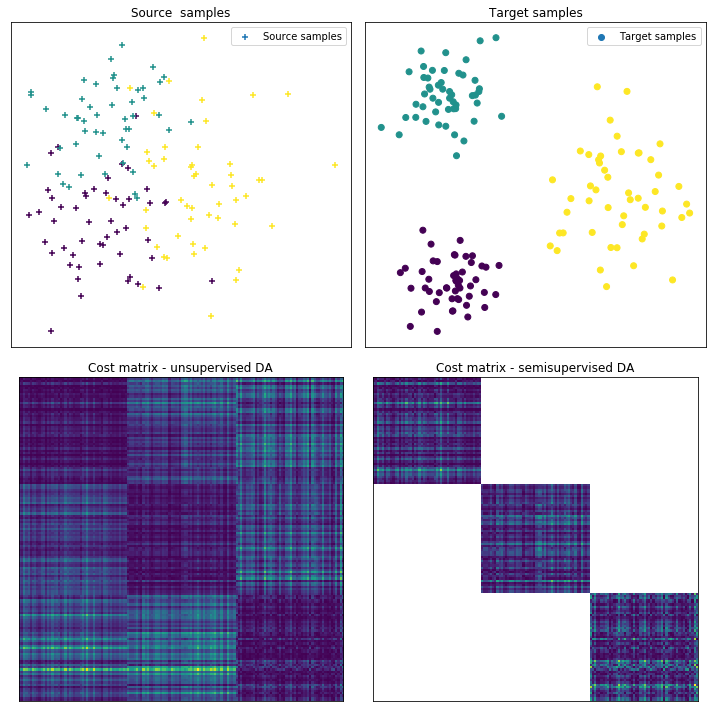

In [5]:
pl.figure(1, figsize=(10, 10))
pl.subplot(2, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Source  samples')

pl.subplot(2, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Target samples')

pl.subplot(2, 2, 3)
pl.imshow(ot_sinkhorn_un.cost_, interpolation='nearest')
pl.xticks([])
pl.yticks([])
pl.title('Cost matrix - unsupervised DA')

pl.subplot(2, 2, 4)
pl.imshow(ot_sinkhorn_semi.cost_, interpolation='nearest')
pl.xticks([])
pl.yticks([])
pl.title('Cost matrix - semisupervised DA')

pl.tight_layout()

# the optimal coupling in the semi-supervised DA case will exhibit " shape
# similar" to the cost matrix, (block diagonal matrix)

Fig 2 : plots optimal couplings for the different methods
---------------------------------------------------------



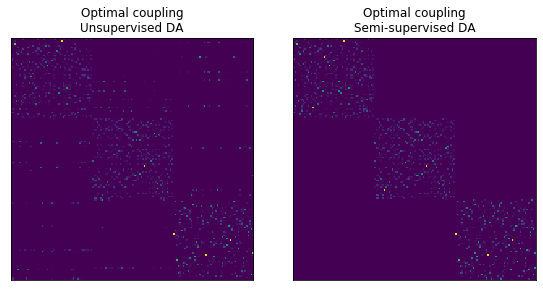

In [6]:
pl.figure(2, figsize=(8, 4))

pl.subplot(1, 2, 1)
pl.imshow(ot_sinkhorn_un.coupling_, interpolation='nearest')
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nUnsupervised DA')

pl.subplot(1, 2, 2)
pl.imshow(ot_sinkhorn_semi.coupling_, interpolation='nearest')
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSemi-supervised DA')

pl.tight_layout()

Fig 3 : plot transported samples
--------------------------------



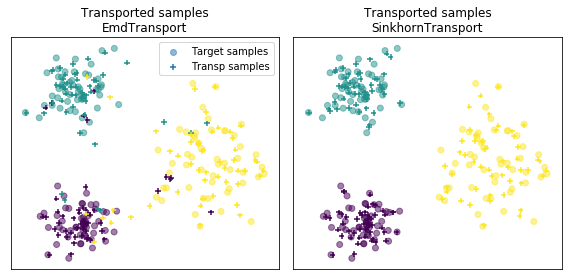

In [7]:
# display transported samples
pl.figure(4, figsize=(8, 4))
pl.subplot(1, 2, 1)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
pl.scatter(transp_Xs_sinkhorn_un[:, 0], transp_Xs_sinkhorn_un[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.title('Transported samples\nEmdTransport')
pl.legend(loc=0)
pl.xticks([])
pl.yticks([])

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
pl.scatter(transp_Xs_sinkhorn_semi[:, 0], transp_Xs_sinkhorn_semi[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.title('Transported samples\nSinkhornTransport')
pl.xticks([])
pl.yticks([])

pl.tight_layout()
pl.show()